In [1]:
%matplotlib inline

# Code Frequency

## abstrak
Di bidang NLP, memproses frekuensi kata/simbol dari suatu korpus termasuk hal yang lumrah. Lagipula, yang diproses adalah bahasa natural/manusia. Kenapa tidak dicoba untuk versi bahasa pemrograman? apakah ada 'insight' yang dapat ditemukan?

## langkah

Pertama, kita butuh fungsi `stripping`.

Ide awal dari fungsi ini adalah untuk menghilangkan segala bentuk bahasa manusia dari kode. Ini tentu diperlukan, lagipula kita mencoba menghitung frekuensi bahasa pemrograman. Tapi tentu saja, kode ini language-dependent. Saya ambil contoh Python. Untuk menambahkan komentar di kode, kita perlu menggunakan `#`. Cara yang lain adalah dengan mengapit komentar di antara simbol  `'''` `'''` atau `"""` `"""`. Sayang, cara ini tidak fool-proof. Tidak ada yang dapat mencegah orang mengapit komentar dengan simbol `'` atau `"`; kita tidak bisa ngehilangkan string begitu saja, karena tidak semua string isinya bahasa manusia. Jadi ya, deal with it. 

In [2]:
import re

def stripping(text):
    '''stripping bahasa manusia dari Python dalam bentuk dokumentasi'''
    text = re.sub('\#(.)*', '#', text)
    text = re.sub(r'\"\"\"[^*]*(?:\*(?!/)[^*]*)*\"\"\"', '""" """', text, re.MULTILINE)
    text = re.sub(r"\'\'\'[^*]*(?:\*(?!/)[^*]*)*\'\'\'", "''' '''", text, re.MULTILINE)
    return text

Jadi, anggap kita punya folder berisi kode bahasa pemrograman (analogi, korpus) yang ingin kita cari tahu frekuensinya. Cara yang mudah menurut saya, adalah menggabungkan semua kode itu ke dalam satu file.

In [3]:
import os
import fnmatch

def combine_codes(folder, extension):
    '''kode ini menggabungkan isi semua kode ber-extension
    pada sebuah folder ke dalm sebuah file txt'''

    with open(folder+'.txt', 'w') as out:
        
        for root, dirs, files in os.walk(folder):
            for file in fnmatch.filter(files, '*.'+extension):
                
                # well, ada beberapa orang yang menyusahkan hidup orang
                # lain dengan menulis kode dalam format non UTF-8.
                #  gaapa. tidak usah dibaca.
                with open(os.path.join(root, file), errors='surrogateescape') as f:
                    try: print(stripping(f.read()), file=out)
                    except: pass

Selanjutnya kita tinggal membuat kode untuk menghitung frekuensi dari setiap kata dan simbol dari korpus. Sebenarnya, ini dapat dilakukan tanpa menggunakan `defaultdict` (dengan `dict[key] = dict.setdefault(key, 0) + 1`) tapi rasanya tidak elegan.

In [4]:
from nltk.tokenize import word_tokenize
from collections import defaultdict as ddict

def code_freq(text):
    tfreq = ddict(int)
    total = 0
    for word in word_tokenize(text):
        tfreq[word]+=1
        total += 1
    return dict(tfreq), total

## ujicoba

Untuk ujicoba saya mendownload 'corpus' `cpython`, a.k.a source-code bahasa Python, dari [Github](https://github.com/python/cpython). Selanjutnya...

In [5]:
combine_codes('cpython-master', 'py')

In [6]:
with open('cpython-master.txt') as f:
    text = f.read()
freq, total = code_freq(text)

In [7]:
# saya bakal buat bar chart, jadi lebih baik kalau datanya sudah
# terurut, dan cuma nampilkan data-data yang berguna

sorted_key, sorted_val = [], []
for key, val in sorted(freq.items(), key=lambda item:-item[1])[:50]:
    sorted_key.append(key)
    sorted_val.append(val/total) # persentase dalam korpus

## hasil

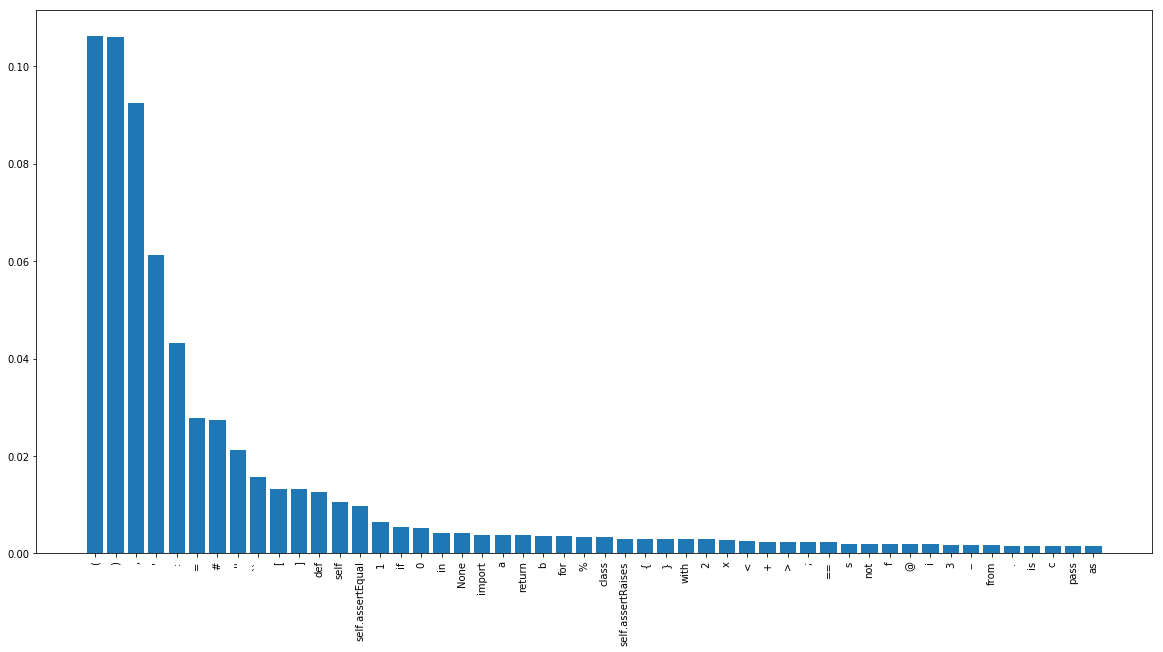

In [8]:
import matplotlib.pyplot as plt

length = len(sorted_key)

plt.figure(figsize=(20,10))
plt.bar(range(length), sorted_val, align='center')
plt.xticks(range(length), sorted_key)
plt.xticks(rotation=90)
plt.show()

## to do
1. menurut saya, 'gaya bahasa' dari setiap corpus berbeda-beda. Walau kecil peluangnya akan memberikan hasil peringkat-sepuluh-teratas yang berbeda, korpus yang berbeda bisa menghasilkan frekuensi kata yang berbeda (misal, proyek yang bergaya OOP dengan yang prosedural). Cara terbaik untuk yakin frekuensi dari sebuah bahasa adalah memproses lebih banyak corpus. apakah `self.assertEqual` memang segitu pentingnya? **buatlah kode untuk memproses setiap corpus yang dikumpulkan di [Awesome Python](https://awesome-python.com/)**.
2. Bagaimana dengan bahasa lain? analisisnya?